# 이미지 하나씩 불러와 평균색상보기

### 라이브러리 불러오기

In [1]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### 평균색상 구하는 함수 정의

In [2]:
def averagecolor(image):
    return np.mean(image, axis=(0, 1))

### 특성 추출 - 바나나 익은 정도를 알기위한 특성 선택 

In [4]:
green_banana = cv2.imread("banana data/greensample.jpg")
overripe_banana = cv2.imread("banana data/overripesample.jpg")
ripe_banana = cv2.imread("banana data/ripesample.jpg")

print (averagecolor(green_banana))
print (averagecolor(overripe_banana))
print (averagecolor(ripe_banana))

[139.80286139 206.86742847 188.72206739]
[104.27028099 143.81804121 165.84011184]
[172.71251886 228.24215834 243.09175733]


### 샘플이미지 보기

Text(0.5, 1.0, 'ripe_banana')

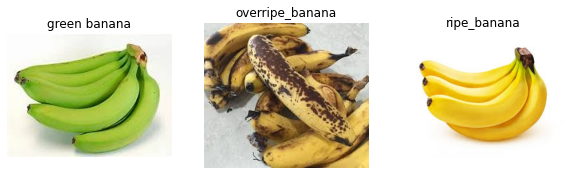

In [16]:
from matplotlib import pyplot as plt

green_banana = cv2.cvtColor(green_banana,cv2.COLOR_BGR2RGB)
overripe_banana = cv2.cvtColor(overripe_banana,cv2.COLOR_BGR2RGB)
ripe_banana = cv2.cvtColor(ripe_banana,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(green_banana)
plt.axis("off")
plt.title("green banana")
plt.subplot(132)
plt.imshow(overripe_banana)
plt.axis("off")
plt.title("overripe_banana")
plt.subplot(133)
plt.imshow(ripe_banana)
plt.axis("off")
plt.title("ripe_banana")


### train 이미지 불러오기

In [18]:
trainX = []
trainY = []
import os

path = "banana data/"
for label in ('green','overripe','ripe'):
    print ("Loading training images for the label: "+label)
    
    # 하위 폴더의 모든 이미지를 읽어옵니다.
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        trainX.append(img_features)
        trainY.append(label)


Loading training images for the label: green
Loading training images for the label: overripe
Loading training images for the label: ripe


In [19]:
print (len(trainX))
print (len(trainY))

91
91


### svm 모델로 학습하기

In [20]:
# SVM은 숫자 값을 사용하기 때문에 먼저 레이블을 숫자로 인코딩합니다.
from sklearn.preprocessing import LabelEncoder  # 레이블을 숫자로 인코딩
encoder = LabelEncoder()                         # 레이블을 숫자로 인코딩
encodedtrainY = encoder.fit_transform(trainY)  # 레이블을 숫자로 인코딩

from sklearn import svm
model = svm.SVC(gamma="scale", decision_function_shape='ovr')
model.fit(trainX, encodedtrainY)

SVC()

In [21]:
print (encodedtrainY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### test이미지 불러온 후 예측 실행

In [22]:
realtestY = np.array(["green","green","green","green","green",
                     "overripe","overripe","overripe","overripe","overripe",
                     "ripe","ripe","ripe","ripe","ripe"])

In [23]:
import os
from sklearn.metrics import classification_report

path = "banana data/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    prediction = model.predict([img_features])[0]
    
    # 예측을 코드화합니다.
    prediction = encoder.inverse_transform([prediction])[0]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print ()
print(classification_report(realtestY, predictedY))

01.jpg: green
02.jpg: green
03.jpg: green
04.jpg: green
05.jpg: green
06.jpg: overripe
07.jpg: overripe
08.jpg: overripe
09.jpg: green
10.jpg: overripe
11.jpg: ripe
12.jpg: ripe
13.jpg: ripe
14.jpg: ripe
15.jpg: overripe

              precision    recall  f1-score   support

       green       0.83      1.00      0.91         5
    overripe       0.80      0.80      0.80         5
        ripe       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.88      0.87      0.87        15
weighted avg       0.88      0.87      0.87        15



### 히트맵 이용하여 혼동행렬 그리기

<AxesSubplot: xlabel='predicted', ylabel='realtest'>

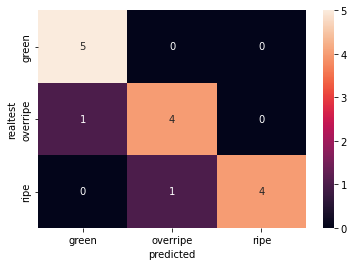

In [24]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['realtest'] = realtestY
df['predicted'] = predictedY

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.realtest,df.predicted)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

### KNN 모델로 학습하기

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(trainX, encodedtrainY)

KNeighborsClassifier(n_neighbors=3)

In [26]:
import os
from sklearn.metrics import classification_report

path = "banana data/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    prediction = KNN.predict([img_features])[0]
    
    # 예측을 코드화합니다.
    prediction = encoder.inverse_transform([prediction])[0]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print ()
print(classification_report(realtestY, predictedY))

01.jpg: green
02.jpg: green
03.jpg: green
04.jpg: green
05.jpg: green
06.jpg: overripe
07.jpg: green
08.jpg: overripe
09.jpg: overripe
10.jpg: overripe
11.jpg: ripe
12.jpg: ripe
13.jpg: ripe
14.jpg: ripe
15.jpg: green

              precision    recall  f1-score   support

       green       0.71      1.00      0.83         5
    overripe       1.00      0.80      0.89         5
        ripe       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.87        15
weighted avg       0.90      0.87      0.87        15



<AxesSubplot: xlabel='predicted', ylabel='realtest'>

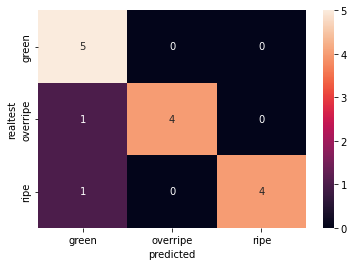

In [27]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['realtest'] = realtestY
df['predicted'] = predictedY

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.realtest,df.predicted)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN2 = KNeighborsClassifier(n_neighbors=5)
KNN2.fit(trainX, encodedtrainY)

KNeighborsClassifier()

In [29]:
import os
from sklearn.metrics import classification_report

path = "banana data/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    prediction = KNN2.predict([img_features])[0]
    
    # 예측을 코드화합니다.
    prediction = encoder.inverse_transform([prediction])[0]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print ()
print(classification_report(realtestY, predictedY))

01.jpg: green
02.jpg: overripe
03.jpg: green
04.jpg: green
05.jpg: green
06.jpg: overripe
07.jpg: green
08.jpg: overripe
09.jpg: overripe
10.jpg: overripe
11.jpg: ripe
12.jpg: ripe
13.jpg: ripe
14.jpg: ripe
15.jpg: green

              precision    recall  f1-score   support

       green       0.67      0.80      0.73         5
    overripe       0.80      0.80      0.80         5
        ripe       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.82      0.80      0.81        15
weighted avg       0.82      0.80      0.81        15



In [30]:
from sklearn.neighbors import KNeighborsClassifier

KNN3 = KNeighborsClassifier(n_neighbors=7)
KNN3.fit(trainX, encodedtrainY)

import os
from sklearn.metrics import classification_report

path = "banana data/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    prediction = KNN3.predict([img_features])[0]
    
    # 예측을 코드화합니다.
    prediction = encoder.inverse_transform([prediction])[0]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# 정확도 평가(sklearn 패키지는 유용한 보고서를 제공합니다)
print ()
print(classification_report(realtestY, predictedY))

01.jpg: green
02.jpg: green
03.jpg: green
04.jpg: green
05.jpg: green
06.jpg: overripe
07.jpg: overripe
08.jpg: overripe
09.jpg: overripe
10.jpg: overripe
11.jpg: ripe
12.jpg: ripe
13.jpg: ripe
14.jpg: ripe
15.jpg: green

              precision    recall  f1-score   support

       green       0.83      1.00      0.91         5
    overripe       1.00      1.00      1.00         5
        ripe       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



<AxesSubplot: xlabel='predicted', ylabel='realtest'>

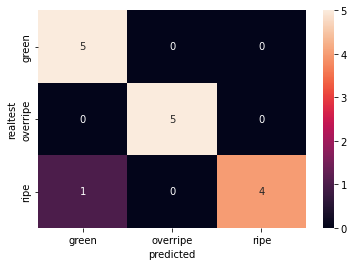

In [31]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['realtest'] = realtestY
df['predicted'] = predictedY

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.realtest,df.predicted)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")